# 01 Soil moisture analysis and validation
### The goal of this course is:
1. Process and visualize  data from the International Soil Moisture Network
2. Load surface soil moisture data from Earth Observation dataset. 
3. Compare and match in-situ soil moisture stations to satellite data.
4. Use statistics for validation.
5. Plot spatial maps and timeseries.
6. Download the data https://we.tl/t-dozLxYUAD5 



## 1. Downloading, preparing and storing surface soil moisture from ISMN
The data is provided through the soil moisture platform (https://ismn.earth/en/).  
he data is regularly updated and easy to download.  
(If possible, open the website, download some data, show filtering capabilities)  

For this case study, the data is downloaded from an European network.  
The network TERENO is used as validation dataset.

In [148]:
# First step, download the dataset : https://we.tl/t-dozLxYUAD5

# Import the packages relevant for the course
from ismn.interface import ISMN_Interface
from pathlib import Path

# Set-up directory
ismn_data_path = Path("/data/Drysat/course/DATA/ISMN/Data_separate_files_header_20150101_20240101_9362_kQFd_20240620")

# Prepare the ISMN interface, used to view, filter and select networks and stations.
ismn_interface = ISMN_Interface(ismn_data_path)

Using the existing ismn metadata in /data/Drysat/course/DATA/ISMN/Data_separate_files_header_20150101_20240101_9362_kQFd_20240620/python_metadata/Data_separate_files_header_20150101_20240101_9362_kQFd_20240620.csv to set up ISMN_Interface. 
If there are issues with the data reader, you can remove the metadata csv file to repeat metadata collection.


<bound method ISMN_Interface.list_networks of ismn.base.IsmnRoot Unzipped at /data/Drysat/course/DATA/ISMN/Data_separate_files_header_20150101_20240101_9362_kQFd_20240620
with Networks[Stations]:
------------------------
  TERENO: ['Gevenich', 'Merzenhausen', 'Schoeneseiffen', 'Selhausen', 'Wildenrath']>


variable        key       
clay_fraction   val                             22.0
                depth_from                       0.0
                depth_to                         0.3
climate_KG      val                              Cfb
climate_insitu  val                          unknown
elevation       val                             94.0
instrument      val           Hydraprobe-II-Sdi-12-B
                depth_from                       0.2
                depth_to                         0.2
latitude        val                          50.9303
lc_2000         val                               10
lc_2005         val                               10
lc_2010         val                               10
lc_insitu       val                          unknown
longitude       val                          6.29747
network         val                           TERENO
organic_carbon  val                             0.74
                depth_from                       0.0
                dep

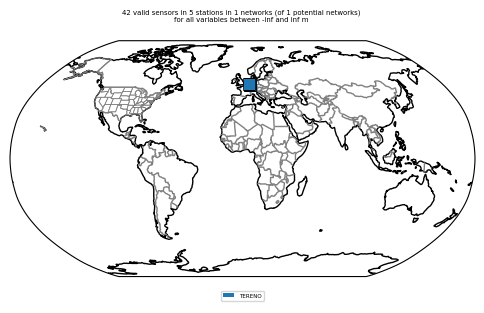

In [149]:
# Now that your interface is loaded, you can check what data you've downloaded and stored into your folder
print(ismn_interface.list_networks)
ismn_interface.plot_station_locations(markersize=85)

# Show one specific station metadata
ismn_interface["TERENO"]["Merzenhausen"][0].metadata.to_pd()

As we can see that the stations are located in Germany in Central Europe, we also have access to the stations metadata.
Using the ISMN package, it is possible to filter and select for specific stations based on metadata.

In [150]:
# Now we'll select the station at a specific depth and filter for a specific time
from datetime import datetime 
# We solely want surface soil moisture data
# We want data from 2016 to 2023 included
# We only want soil_moisture data

depth = 0.10
start_time = datetime(2016, 1, 1)
end_time = datetime(2023, 12, 31)
variable = "soil_moisture"

# Let's store the data based on a set of conditions
conditions = (ismn_interface.metadata['variable'].val == variable) & \
             (ismn_interface.metadata['instrument'].depth_to <= depth)

# Store the index of the stations fullfilling the conditions
idx_of_stations = ismn_interface.metadata[conditions].index.to_list()

# Finally read the timeseries based on the indexes
ts, meta = ismn_interface.read(idx_of_stations, return_meta=True)
ts.head()

# 
meta.head()

0        3        5        11       16  \
variable       key                                                       
clay_fraction  val            22.0     22.0     22.0     22.0     22.0   
               depth_from      0.0      0.0      0.0      0.0      0.0   
               depth_to        0.3      0.3      0.3      0.3      0.3   
climate_KG     val             Cfb      Cfb      Cfb      Cfb      Cfb   
climate_insitu val         unknown  unknown  unknown  unknown  unknown   

                                17       18       21       24       27  \
variable       key                                                       
clay_fraction  val            22.0     20.0     20.0     20.0     23.0   
               depth_from      0.0      0.0      0.0      0.0      0.0   
               depth_to        0.3      0.3      0.3      0.3      0.3   
climate_KG     val             Cfb      Cfb      Cfb      Cfb      Cfb   
climate_insitu val         unknown  unknown  unknown  unknown  unknown   

                                28       32       37       40  
variable       key                                             
clay_fraction  val            23.0     23.0     22.0     22.0  
               depth_from      0.0      0.0      0.0      0.0  
               depth_to        0.3      0.3      0.3      0.3  
climate_KG     val             Cfb      Cfb      Cfb      Cfb  
climate_insitu val         unknown  unknown  unknown  unknown

### We now have two variables:
- _"ts"_   : containing the soil moisture timeseries for each indexed stations.
- _"meta"_ : containing the linked metadata for each indexed stations


Let's extract one station and plot it to see what the soil moisture product looks like!
For our example, we'll use the station **Gevenich**.

In [151]:
# Here we select only the metadata colums where the multiindex station/val is Gevenich
Gevenich_station_index = meta.loc[('station', 'val')][meta.loc[('station', 'val')] == 'Gevenich'].index


Gevenich_metadata = meta.loc[:, Gevenich_station_index]
Gevenich_soil_moisture = ts.loc[:, Gevenich_station_index]

# We extract our soil moisture data.
Gevenich_soil_moisture

idx                             0                                             \
variable            soil_moisture soil_moisture_flag soil_moisture_orig_flag   
date_time                                                                      
2015-01-01 00:00:00           NaN                NaN                     NaN   
2015-01-01 01:00:00           NaN                NaN                     NaN   
2015-01-01 02:00:00           NaN                NaN                     NaN   
2015-01-01 03:00:00           NaN                NaN                     NaN   
2015-01-01 04:00:00           NaN                NaN                     NaN   
...                           ...                ...                     ...   
2023-12-31 20:00:00         0.354                  G                  4_2002   
2023-12-31 21:00:00         0.352                  G                  4_2002   
2023-12-31 22:00:00         0.354                  G                  4_2002   
2023-12-31 23:00:00         0.354                  G                  4_2002   
2024-01-01 00:00:00         0.351                  G                  4_2002   

idx                             3                                             \
variable            soil_moisture soil_moisture_flag soil_moisture_orig_flag   
date_time                                                                      
2015-01-01 00:00:00         0.382                D03                  4_2002   
2015-01-01 01:00:00         0.384                D03                  4_2002   
2015-01-01 02:00:00         0.382                D03                  4_2002   
2015-01-01 03:00:00         0.384                D03                  4_2002   
2015-01-01 04:00:00         0.383                D03                  4_2002   
...                           ...                ...                     ...   
2023-12-31 20:00:00         0.398                  G                  4_2002   
2023-12-31 21:00:00         0.401                  G                  4_2002   
2023-12-31 22:00:00         0.401                  G                  4_2002   
2023-12-31 23:00:00         0.400                  G                  4_2002   
2024-01-01 00:00:00         0.400                  G                  4_2002   

idx                             5                                             
variable            soil_moisture soil_moisture_flag soil_moisture_orig_flag  
date_time                                                                     
2015-01-01 00:00:00         0.358                D03                  4_2002  
2015-01-01 01:00:00         0.358                D03                  4_2002  
2015-01-01 02:00:00         0.358                D03                  4_2002  
2015-01-01 03:00:00         0.358                D03                  4_2002  
2015-01-01 04:00:00         0.358                D03                  4_2002  
...                           ...                ...                     ...  
2023-12-31 20:00:00           NaN                NaN                     NaN  
2023-12-31 21:00:00           NaN                NaN                     NaN  
2023-12-31 22:00:00           NaN                NaN                     NaN  
2023-12-31 23:00:00           NaN                NaN                     NaN  
2024-01-01 00:00:00           NaN                NaN                     NaN  

[78889 rows x 9 columns]

For each indexed stations, we see three columns. One soil moisture and two flags.  
We will only work with the latest ISMN flagging system.
Let's select the first station and only select the observations marked as "G":  
Which mean **valid** soil moisture observation.

<Axes: xlabel='Time', ylabel='SSM [m³/m³]'>

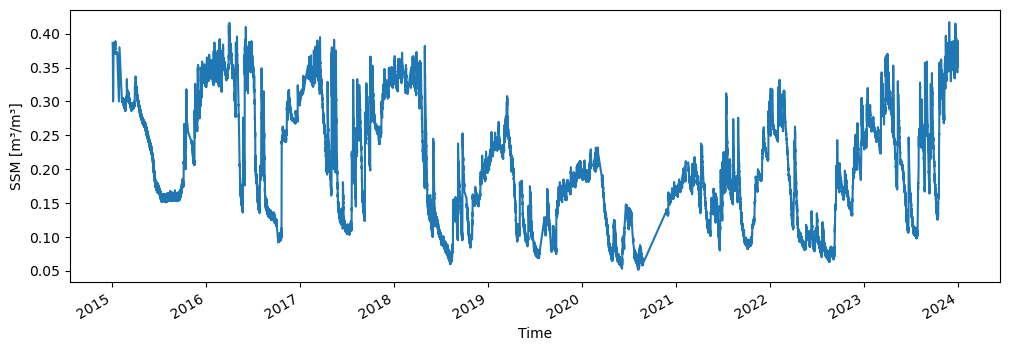

In [152]:
first_station_soil_moisture = Gevenich_soil_moisture.loc[:, Gevenich_soil_moisture.columns.get_level_values('idx') == 0][0]

# filter the station based on the correct flag and plot your data
first_station_soil_moisture = first_station_soil_moisture[first_station_soil_moisture["soil_moisture_flag"] == "G"]

# plot the station
first_station_soil_moisture["soil_moisture"].plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SSM [m³/m³]'
    )

## Sentinel-1 time-series processing
In this exercise, we'll look into:
1. developping a simple datacube
2. Create an image of a Sentinel-1 overpass
3. Read through a stack of files to retrieve soil moisture
4. Combine our in-situ station data with Sentinel-1 and perform a validation of our product.

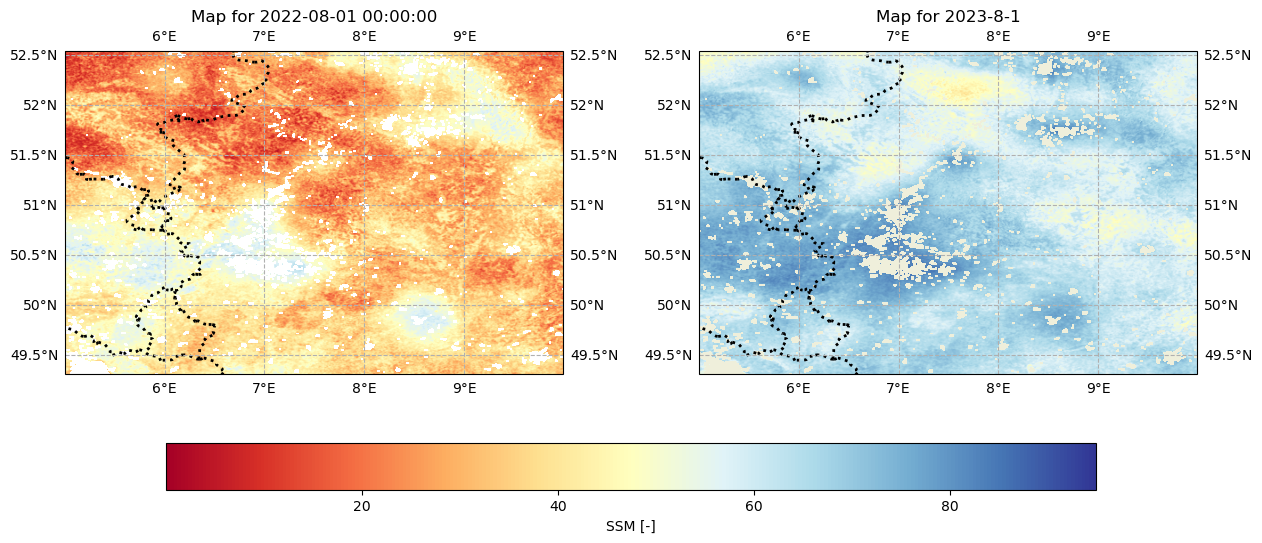

In [200]:
# First we will use the Equi7Grid package
# The package allows to handle the geometric and geographic operations of a gridded and tiled projection system.

# To find the tile we want to use according to the equi7grid standard, we can simply initialize a e7 tile 
# at the desired resolution (500m)
# -ø- Typically, the values are stored as int16 to save for space
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np

# read the .nc file dataset 
SWI_005_germany_nc = xr.open_dataset("/data/Drysat/course/DATA/combined/SWI_V005_20162024_germany.nc")

# let's filter two dates with a year interval to check the spatial patterns
datetime_1 = datetime(2022, 8, 1)
datetime_2 = datetime(2023, 8, 1)
SWI_005_germany_nc_2022 = SWI_005_germany_nc.sel(time=datetime_1, method="nearest")
SWI_005_germany_nc_2023 = SWI_005_germany_nc.sel(time=datetime_2, method="nearest")

# spatial plotting example
fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

# prepare the data
variable_name = 'SWI_005'
var1 = SWI_005_germany_nc_2022[variable_name]/10
var2 = SWI_005_germany_nc_2023[variable_name]/10

var1.values[var1.values > 95] = np.nan
var2.values[var2.values > 95] = np.nan
# Get coordinates
lons = SWI_005_germany_nc.lon.values
lats = SWI_005_germany_nc.lat.values

# Plot for date1
im1 = axs[0].imshow(var1, origin='lower', extent=(lons.min(), lons.max(), lats.min(), lats.max()),
              cmap='RdYlBu', transform=ccrs.PlateCarree(), vmin=0.001, vmax=95)
axs[0].set_title(f'Map for {datetime_1}')
axs[0].add_feature(cfeature.BORDERS, linestyle=':', linewidth=2)
axs[0].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, linestyle='--')

# Plot for date2
im2 = axs[1].imshow(var2, origin='lower', extent=(lons.min(), lons.max(), lats.min(), lats.max()),
              cmap='RdYlBu', transform=ccrs.PlateCarree(), vmin=0.001, vmax=95)
axs[1].set_title(f'Map for {datetime_2.year}-{datetime_2.month}-{datetime_2.day}')
axs[1].add_feature(cfeature.BORDERS, linestyle=':', linewidth=2)
axs[1].add_feature(cfeature.LAND, edgecolor='black')
axs[1].gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, linestyle='--')

fig.colorbar(im1, ax=axs, orientation='horizontal', shrink=0.8, label='SSM [-]')
# Adjust layout
# plt.tight_layout()

# Display the plot
plt.show()

Point to extract: lat = 50.9892, lon = 6.32355


<Axes: xlabel='Time', ylabel='SWI [-]'>

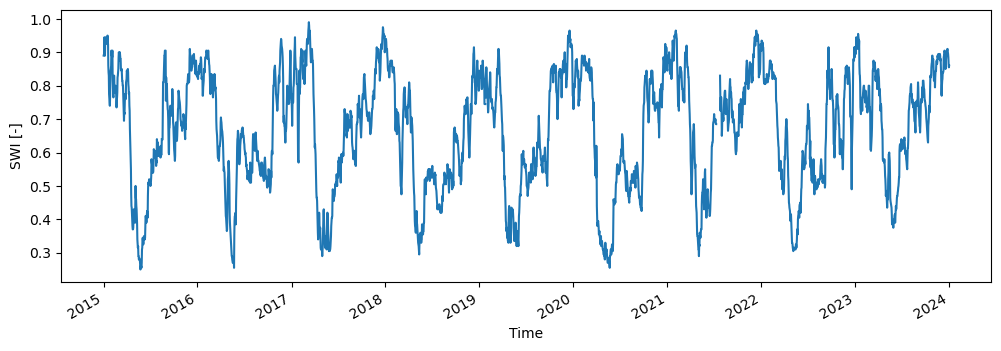

In [154]:
# Let's find where is the closest pixel for our network
gevenich_lat, gevenich_lon = meta[0].latitude.val, meta[0].longitude.val
print(f"Point to extract: lat = {gevenich_lat}, lon = {gevenich_lon}")

# Select the nearest point
gevenich_satellite_ts = SWI_005_germany_nc.sel(lat=gevenich_lat, lon=gevenich_lon, method='nearest') / 1000 # Here we add the scaling factor to reach 0-1 range
gevenich_satellite_ts.SWI_005.values

# Let's store the data as a pandas dataframe
gevenich_satellite_pd = pd.DataFrame(
    {"SWI_005": gevenich_satellite_ts.SWI_005.values},
    index=gevenich_satellite_ts.time
)

# filter the no-data values
gevenich_satellite_pd[gevenich_satellite_pd["SWI_005"] <= 0] = np.nan
gevenich_satellite_pd[gevenich_satellite_pd["SWI_005"] > 1] = np.nan

# plot the station
gevenich_satellite_pd["SWI_005"].plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SWI [-]'
    )

# Timeseries validation
We now have two timeseries at different temporal sampling as well as different scaling.  
To reach a point of comparability we first need to scale and temporally match the dataset.

- Scaling can be reached via multiple approach, in today's example we'll use a standard deviation approach.  
By matching the mean and standard deviation get rid of dataset bias with minimal impact of potential dataset outliers

- Combine both dataset by matching their date index.  
One specificity of the SWI dataset is that the values are daily averaged, so we will also temporally resample the ISMN data as daily values  
And obtain a daily-resolution comparison


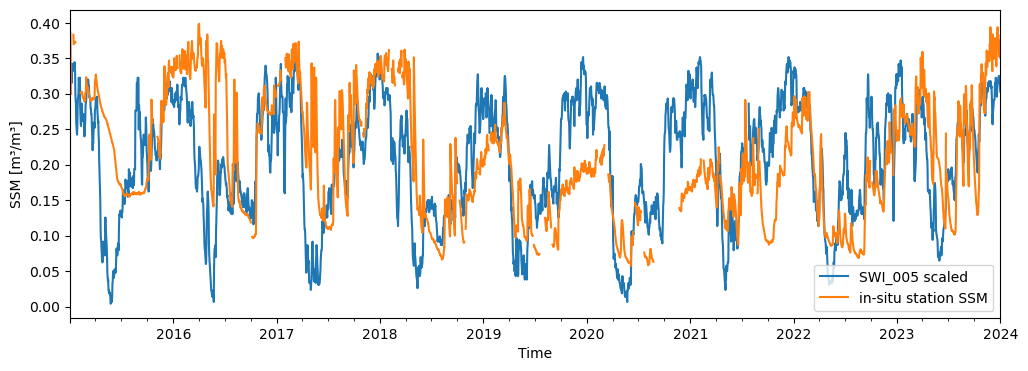

In [213]:
# scale the SWI to insitu data
reference = first_station_soil_moisture["soil_moisture"].values
source = gevenich_satellite_pd["SWI_005"].values

gevenich_satellite_pd["scaled_SWI_005"] = ((source - np.nanmean(source)) / np.nanstd(source)) * np.nanstd(reference) + np.nanmean(reference)

# daily resample the in-situ data
in_situ_daily_ssm = first_station_soil_moisture["soil_moisture"].resample('D').mean().rename("soil_moisture").to_frame()

# merge the datasets
gevenich_satellite_pd.index.name = "date_time"
combined_dataset = pd.merge_asof(
    in_situ_daily_ssm["soil_moisture"], 
    gevenich_satellite_pd["scaled_SWI_005"], 
    on="date_time", 
    direction="nearest"
    )
combined_dataset.set_index("date_time", inplace=True)

#Let's check the timeseries again
combined_dataset["scaled_SWI_005"].plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SSM [m³/m³]',
    label="SWI_005 scaled"
    )
combined_dataset["soil_moisture"].plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SSM [m³/m³]',
    label="in-situ station SSM"
    )

plt.legend(loc="lower right")

nrmsd = 0.2086951795343949
pearson = 0.5432249502161999
spearman = 0.5752957141857143
kendall = 0.40459818462267183


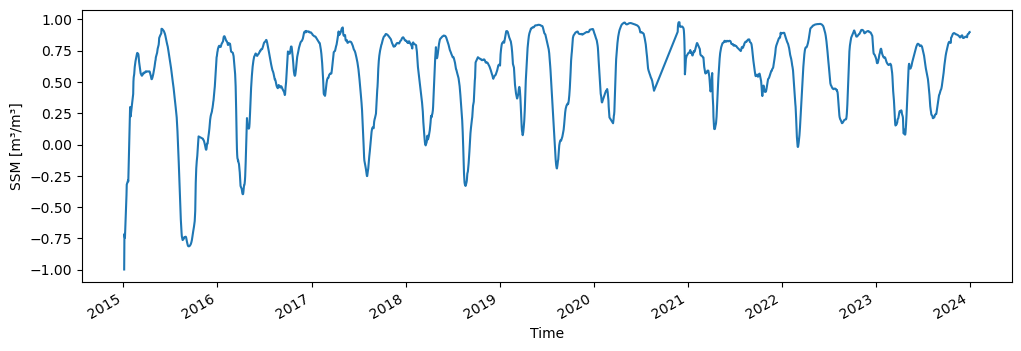

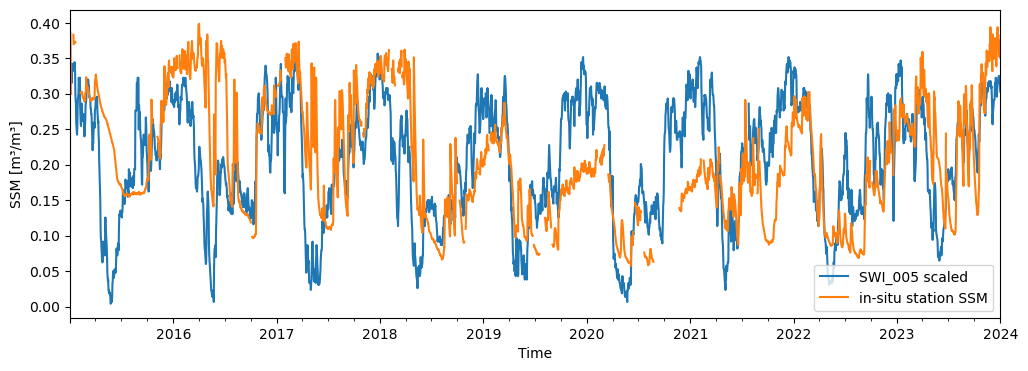

In [235]:
# Now we can also plot correlation statistics, root mean square errors and so on
# We're using the pytesmo package to get our standardized values
from pytesmo import metrics

combined_dataset_no_na = combined_dataset.dropna()

array_1 = np.array(combined_dataset_no_na["soil_moisture"])
array_2 = np.array(combined_dataset_no_na["scaled_SWI_005"])

# 
nrmsd = metrics.nrmsd(array_1, array_2)
pearson = metrics.pearson_r(array_1, array_2)
spearman = metrics.spearman_r(array_1, array_2)
kendall = metrics.kendall_tau(array_1, array_2)

# results
print(f"nrmsd = {nrmsd}")
print(f"pearson = {pearson}")
print(f"spearman = {spearman}")
print(f"kendall = {kendall}")

# Calculate rolling means with a 30-day window
rollcorr = combined_dataset_no_na['soil_moisture'].rolling(window="120D").corr(combined_dataset_no_na["scaled_SWI_005"])
rollcorr.plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SSM [m³/m³]',
)
plt.show()
plt.close()
combined_dataset["scaled_SWI_005"].plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SSM [m³/m³]',
    label="SWI_005 scaled"
    )
combined_dataset["soil_moisture"].plot(
    figsize=(12, 4),
    xlabel='Time', 
    ylabel='SSM [m³/m³]',
    label="in-situ station SSM"
    )

plt.legend(loc="lower right")